In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA =df[df['job_title_short']=='Data Analyst'].copy()
df_DA_explode = df_DA.explode('job_skills')

In [9]:
skill_stats = df_DA_explode.groupby('job_skills').agg(
                                                      skill_count = ('job_skills', 'count'),
                                                      median_salary = ('salary_year_avg', 'median')
                                                     )

In [13]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

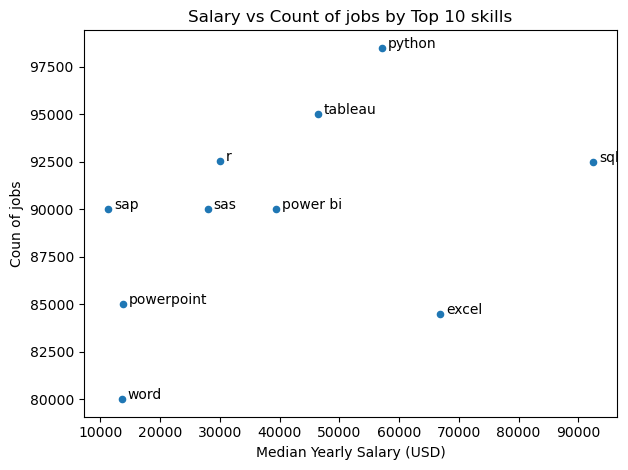

In [25]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]+1000, skill_stats['median_salary'].iloc[i], txt)

plt.ylabel('Coun of jobs')
plt.xlabel('Median Yearly Salary (USD)')
plt.title('Salary vs Count of jobs by Top 10 skills')
plt.tight_layout()
plt.show()

In [ ]:
# Create a scatter plot to compare the median yearly salary 
# and the number of jobs based on the job_title_short column.
# To create the scatter plot first create a new DataFrame using the groupby() method to aggregate 
# and find the median salary and job count for each job title.
# Annotate each point with the job title name.

In [27]:
df_title_jobs = df.copy()

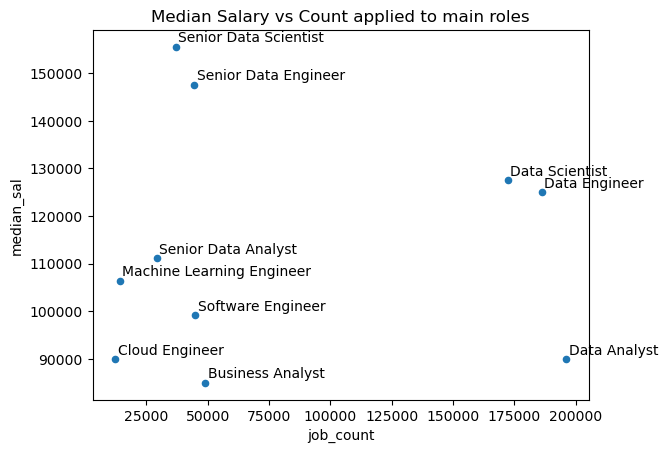

In [38]:
df_count_jobs = df_title_jobs.groupby('job_title_short').agg(
                                             job_count = ('job_title_short', 'count'),
                                             median_sal = ('salary_year_avg', 'median')
                                               ).dropna()

df_count_jobs.plot(kind='scatter', x='job_count', y='median_sal')
plt.title('Median Salary vs Count applied to main roles')


for i, txt in enumerate(df_count_jobs.index):
    plt.text(df_count_jobs['job_count'].iloc[i]+1000, df_count_jobs['median_sal'].iloc[i]+1000, txt)
    

In [39]:
# Create a scatter plot to visualize the relationship between the number of job postings and 
# median yearly salary for the top 7 countries based on highest number of job postings. 
# Annotate each point with the country's name.

In [40]:
df_country = df.copy()

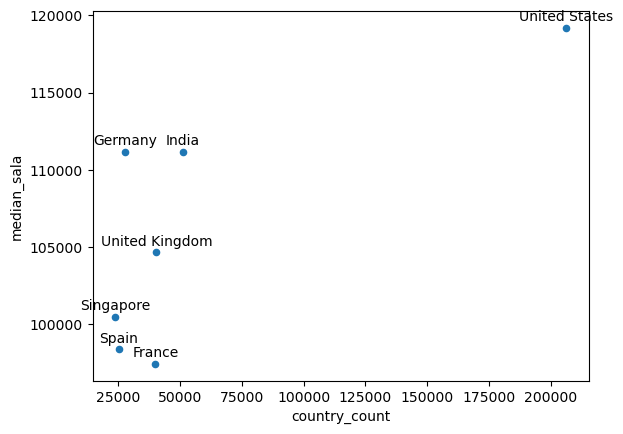

In [66]:
df_count_country = df_country.groupby('job_country').agg(
                                     country_count = ('job_country','count'),
                                     median_sala = ('salary_year_avg','median')
                                      ).dropna()
df_count_country= df_count_country.sort_values(by='country_count',ascending=False).head(7)

df_count_country.plot(kind='scatter', x='country_count', y='median_sala')

for i, txt in enumerate(df_count_country.index):
    plt.text(df_count_country['country_count'].iloc[i],
              df_count_country['median_sala'].iloc[i]+250, 
              df_count_country.index[i], 
              ha='center', va='bottom')

In [67]:
#Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
#Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
#United States for the job_country
#'Full-time' and 'Contractor' for the job_schedule_type
#Remove roles that do not have any yearly salary data.
#Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
#For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
#Ensure the legend is appearing.
#Label the plot's axis and title appropriately.

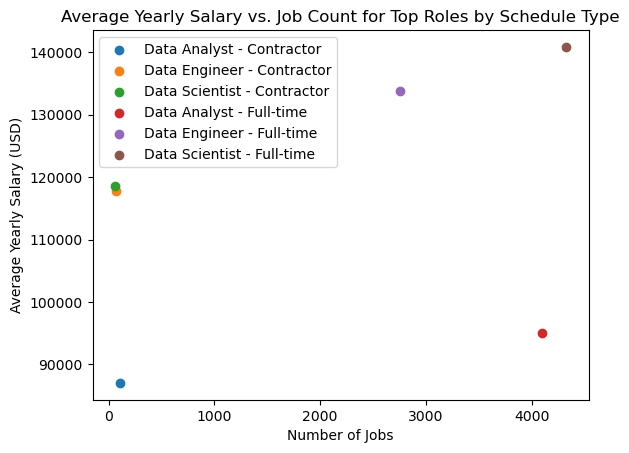

In [80]:


# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &    #Filtrar un solo valor
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &   # Filtrar mas de un valor
   (df['job_title_short'].isin(target_job_titles))  # Filtrar varios valores en una lista
].dropna(subset=['salary_year_avg']).copy()   # Eliminar NaN solo en esa columna

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()